## LATAR BELAKANG

### diabetes adalah penyakit yang disebabkan kelebihan gula didalam darah atau bisa juga disebabkan oleh fakotr keturunan, banyak sekali orang yang kurang memperhatikan konidisi tubuhnya atau cek up mengenai kesehatannya, juga kurangnya orang yang memperhatikan pola hidup sehat, seperti seringnya memakan makanan yang mengandung banyak gula, atau meminum minuman yang mengandung alkohol atau pemanis buatan, serta jarangnya melakukan olahraga.

### nah, dengan pola hidup yang tidak sehat serta banyak orang yang tidak melakukan cek up kesehatan, saya disini ingin melakukan prediksi diabetes dengan menggunakan contoh dataset yang kami ambil dari kaggle.

## selanjutnya saya ingin menjelaskan kolom apa saja yang ada di dalam dataset:

###1. gender = jenis kelamin
###2. age = usia/umur
###3. hypertension = tekanan darah tinggi. 1(iya) atau 0(tidak)
###4. heart_disease = riwayat penyakit jantung. 1(iya) atau 0(tidak)
###5. smoking_story = riwayat merokok
###6. bmi = body mass index atau menunjukan bahwa kelebihan berat badan untuk menjadi berat badan yang ideal.
###7. HbA1c_level = hemoglobin level
###8. blood_glocose_level = gula darah
###9. diabetes = 1 (menunjukan terkena diabetes) atau 0 (tidak terkena diabetes)

##TUJUAN

###1. apa saja faktor yang menyebabkan penyakit diabetes?
###2. apakah orang yang memiliki kelebihan berat badan pasti terkena diabetes?
###3. apakah orang yang memiliki gula darah yang tinggi pasti terkena diabetes?

###tujuan utama dari permasalahan ini kami ingin memprediksi penyakit diabetes pada seseorang bedasarkan dataset tersebut. perlu diingat bahwa hasil tersebut belum tentu 100% benar atau mungkin hanya mendekati saja.

###Saya disini akan membuat sebuah klasifikasi yaitu yang terkena diabetes (1) dan yang tidak diabetes (0)

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn



## 2. Eksplorasi Dataset

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Informasi pada data:

- Terdapat kolom gender & riwayat kesehatan pasien
- Terdapat kolom diabetes (yang akan digunakan sebagai dependen variabel) atau hasil dari prediksi

### langkah selanjutnya adalah mengecek apakah ada kolom yang NaN(tidak ada isinya)

In [3]:
print("Shape data (baris, kolom):" + str(df.shape))
print(df.info())

Shape data (baris, kolom):(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


Informasi pada data :

- Ada 100000 entri data
- Tidak ada kolom yang NaN (tidak ada isinya)
- Terdapat 3 jenis tipe data seperti int64, object, dan float64

In [4]:
df.shape

(100000, 9)

Diketahui bahwa dataset tersebut berisi 100000 baris dan 9 kolom

In [5]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Informasi pada data :

- Range kadar gula darah berkisar 80-300
- Range HbA1c_level berkisar 3,5-9%

## Selanjutnya, saya ingin mengroup total unique value pada masing-masing kolom yang non-numerik

In [7]:
for col in df.columns:
   if df.dtypes[col] != "object":
       continue
   print('-' * 40 + col + '-' * 40 , end=' - ')
   display(df[col].value_counts().head(10))

----------------------------------------gender---------------------------------------- - 

,count
gender,
Female,58552
Male,41430
Other,18


----------------------------------------smoking_history---------------------------------------- - 

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


### Informasi pada data :

- Jumlah gender lebih banyak Wanita daripada Pria.
- Disini juga diketahui pada kolom smoking_histori atau riwayat merokok banyak sekali orang yang tidak diketahui informasinya.
- Total data orang yang belum pernah merokok lebih banyak dari yang lainnya selain yang tidak diketahui informasinya.


## selanjutnya, saya ingin menampilkan hasil dari orang yang menderita diabetes dan yang tidak menderita diabetes

In [8]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


### Informansi pada data:

- Disini kita dapat melihat bahwa orang yang menderita diabetes sebanyak 8500 orang dan yang tidak menderita diabetes sebanyak 91500 orang

## lalu saya ingin menampilkan orang yg menderita diabetes bedasarkan jenis kelaminnya

In [9]:
df.groupby('gender')['diabetes'].sum()

,diabetes
gender,
Female,4461
Male,4039
Other,0


### Informasi pada data:

- Disini kita mendapatkan bahwa dari 8500 orang yang menderita diabetes, sebanyak 4461 orang adalah wanita sedangkan untuk pria sebanyak 4039.

## Selanjutnya, saya ingin melihat visualisasi data pada kolom yang kosong ada apa saja dengan diagram.

<Axes: >

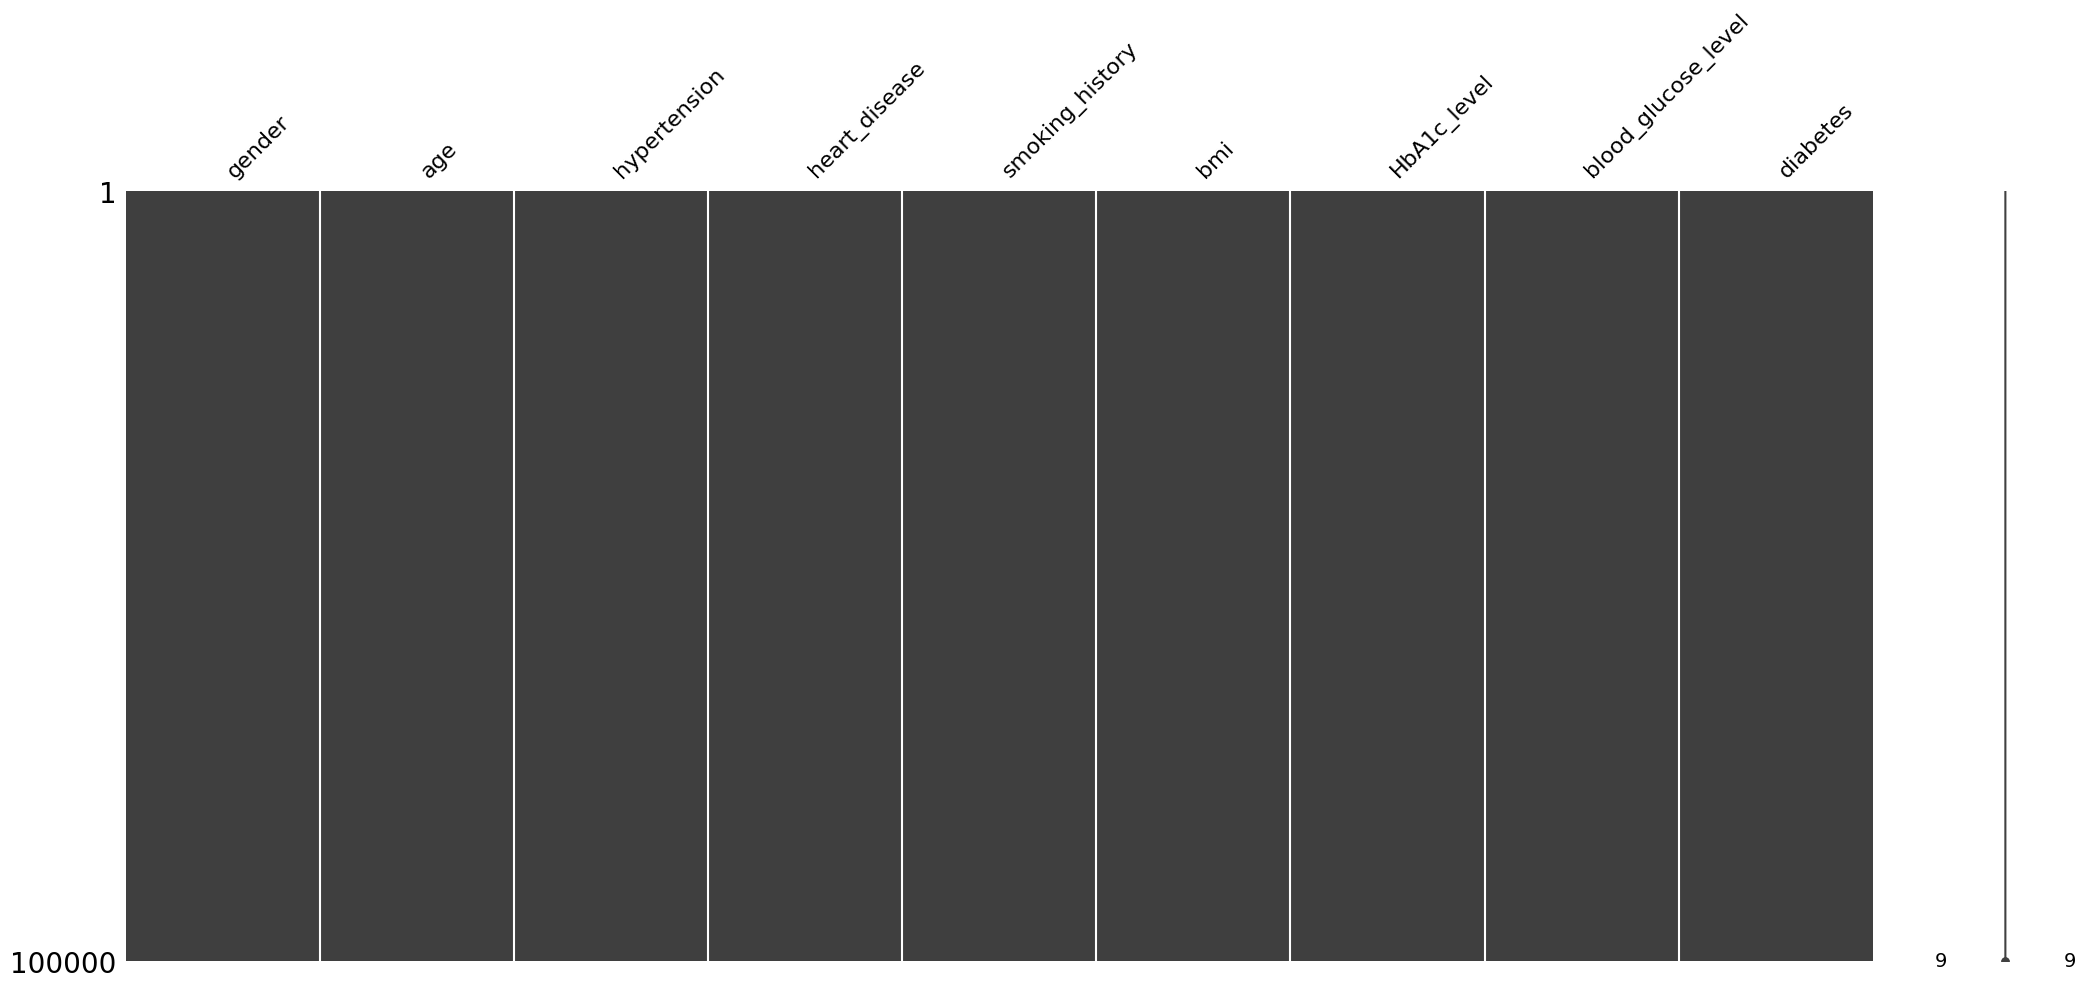

In [10]:
import missingno as msno
msno.matrix(df)


## Disini kita dapat melihat bahwa dalam diagram tersebut bahwa tidak ada data yang NaN(tidak ada isinya) di setiap kolom

###kebetulan dataset yang kami gunakan tidak ada yang NaN (tidak ada isinya) jadi kita tidak perlu membersihkan data yang kosong

## Selanjutnya, saya ingin melihat bagaimana variasi/persebaran data pada dataset tersebut atau mencari data outliers.



## Data Cleaning outlier
- Data cleaning atau cleansing merupakan tahapan untuk membersihkan data yang berantakan.
- Outliers adalah data yang memiliki nilai sangat jauh dari nilai umumnya, atau dengan kata lain memiliki nilai yang ekstrem. Outliers dapat mempengaruhi pegambilan kesimpulan penelitian dari hasil uji statistik.


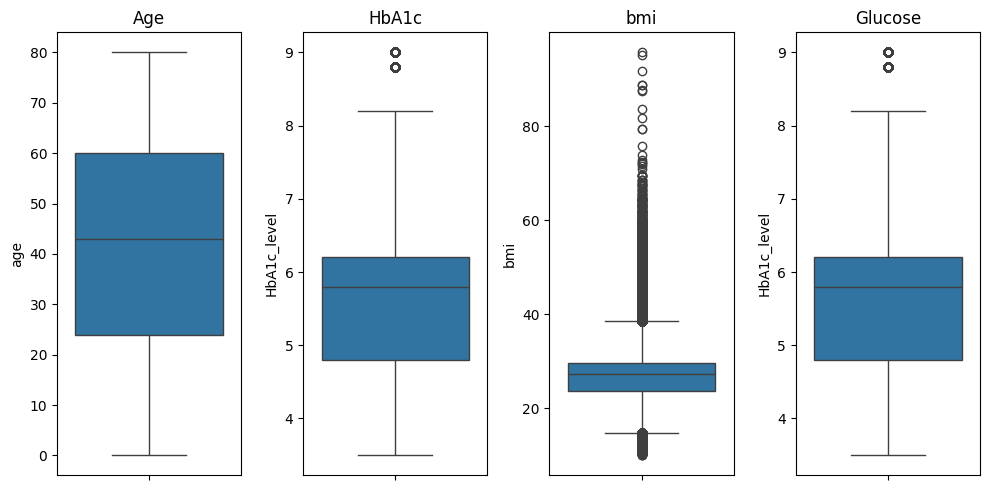

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
sns.boxplot(ax=axes[0], data=df['age'])
axes[0].set_title('Age')
sns.boxplot(ax=axes[1], data=df['HbA1c_level'])
axes[1].set_title('HbA1c')
sns.boxplot(ax=axes[2], data=df['bmi'])
axes[2].set_title('bmi')
sns.boxplot(ax=axes[3], data=df['HbA1c_level'])
axes[3].set_title('Glucose')

plt.tight_layout()
plt.show()


### Informasi pada data :

- Tidak ada data outliers di kolom age
- Terdapat beberapa data outliers di kolom HbA1c, bmi, dan kolom glucose

### Nah Untuk mengatasi data outlier yang ada, saya akan menggunakan metode IQR (Interquartile Range).

In [12]:
Q1 = df[['HbA1c_level', 'bmi', 'blood_glucose_level']].quantile(0.25)
Q3 = df[['HbA1c_level', 'bmi', 'blood_glucose_level']].quantile(0.75)
IQR = Q3 - Q1
filter = (df['HbA1c_level'] >= Q1['HbA1c_level'] - 1.5 * IQR['HbA1c_level']) & (df['HbA1c_level'] <= Q3['HbA1c_level'] + 1.5 * IQR['HbA1c_level']) & (df['bmi'] >= Q1['bmi'] - 1.5 * IQR['bmi']) & (df['bmi'] <= Q3['bmi'] + 1.5 * IQR['bmi']) & (df['blood_glucose_level'] >= Q1['blood_glucose_level'] - 1.5 * IQR['blood_glucose_level']) & (df['blood_glucose_level'] <= Q3['blood_glucose_level'] + 1.5 * IQR['blood_glucose_level'])
data_filtered = df.loc[filter]

In [13]:
# Q1 = data_filtered['bmi'].quantile(0.25)
# Q3 = data_filtered['bmi'].quantile(0.75)
# IQR = Q3 - Q1
# filter = (data_filtered['bmi'] >= Q1 - 1.5 * IQR) & (data_filtered['bmi'] <= Q3 + 1.5 * IQR)
# df_filtered = data_filtered.loc[filter]

### berikut adalah hasil data setelah melakukan data cleaning

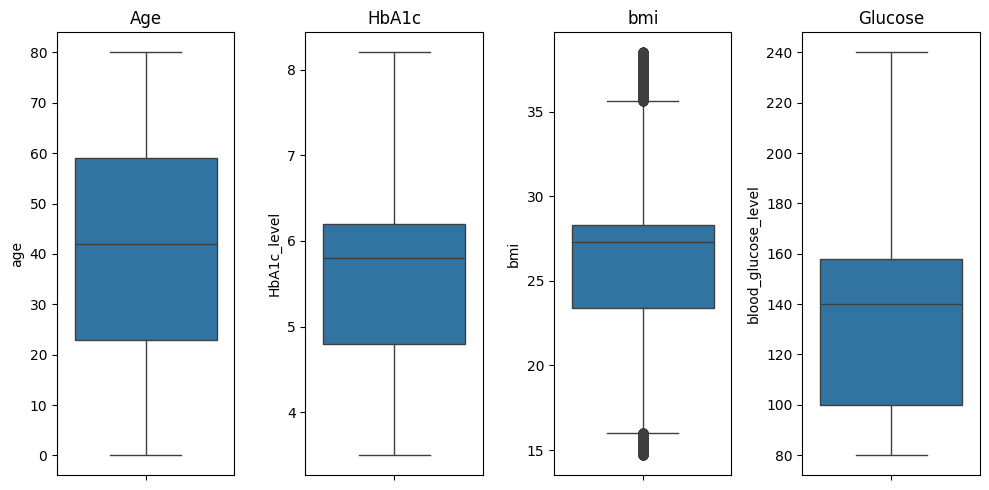

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
sns.boxplot(ax=axes[0], data=data_filtered['age'])
axes[0].set_title('Age')
sns.boxplot(ax=axes[1], data=data_filtered['HbA1c_level'])
axes[1].set_title('HbA1c')
sns.boxplot(ax=axes[2], data=data_filtered['bmi'])
axes[2].set_title('bmi')
sns.boxplot(ax=axes[3], data=data_filtered['blood_glucose_level'])
axes[3].set_title('Glucose')

plt.tight_layout()
plt.show()


Menurut WHO, kategori berat badan ideal berdasarkan BMI (Body Mass Index) adalah sebagai berikut:
- Kurang dari 18,5: Berat badan kurang
- 18,5–24,9: Berat badan normal
- 25–29,9: Berat badan berlebih
- Lebih dari 30: Obesitas

BMI juga dapat diklasifikasikan sebagai berikut:
- BMI 30,0–34,9: Obesitas tingkat I
- BMI 35,0–39,9: Obesitas tingkat II
- BMI ≥ 40,0: Obesitas tingkat III

## alasannya:

- yang pertama, persebaran data pada kolom bmi terlalu jauh di karenakan setiap orang memiliki index bmi yang berbeda-beda.
- yang kedua, tipe data nya dia decimal dua angka di belakang koma, nah karena 2 angka dibelakang koma, jadi hasilnya lebih unik jadi susah untuk dibersihkan menggunakan quartil
- yang ketiga, karena jumlah data banyak yaitu sebesar 100000 data


In [15]:
abnormal_bmi_before = df[df['bmi'] >= 40]['bmi'].count()
abnormal_bmi = data_filtered[data_filtered['bmi'] >= 40]['bmi'].count()
max_bmi_before = df['bmi'].max()
max_bmi = data_filtered['bmi'].max()
data_filtered['bmi'].describe()

print("Sebelum")
bf = f"Total abnormal bmi: {abnormal_bmi_before}, BMI Tertinggi: {max_bmi_before}\n"
print(bf)
print("Sesudah")
af = f"Total abnormal bmi: {abnormal_bmi}, BMI Tertinggi: {max_bmi}\n"
print(af)

Sebelum
Total abnormal bmi: 4621, BMI Tertinggi: 95.69

Sesudah
Total abnormal bmi: 0, BMI Tertinggi: 38.5



##jadi, cara yang saya temukan untuk membersihkan data yang masih banyak outliernya, dengan membulatkan bilang decimalnya, jadi data bminya yang awal nya bertipe data float kita ubah ke int

### cara mengubah nilai BMI menjadi tanpa koma.

In [16]:
df['bmi'] = df['bmi'].astype(int)
df['bmi']

,bmi
0,25
1,27
2,27
3,23
4,20
...,...
99995,27
99996,17
99997,27
99998,35


In [17]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['bmi'] >= Q1 - 1.5 * IQR) & (df['bmi'] <= Q3 + 1.5 * IQR)
df_filtered = df.loc[filter]

In [18]:
Q1 = df_filtered['bmi'].quantile(0.25)
Q3 = df_filtered['bmi'].quantile(0.75)
IQR = Q3 - Q1
filter = (df_filtered['bmi'] >= Q1 - 1.5 * IQR) & (df_filtered['bmi'] <= Q3 + 1.5 * IQR)
data2 = df_filtered.loc[filter]

In [19]:
Q1 = data2['bmi'].quantile(0.25)
Q3 = data2['bmi'].quantile(0.75)
IQR = Q3 - Q1
filter =  (data2['bmi'] >= Q1 - 1.5 * IQR) &  (data2['bmi'] <= Q3 + 1.5 * IQR)
data3 = data2.loc[filter]

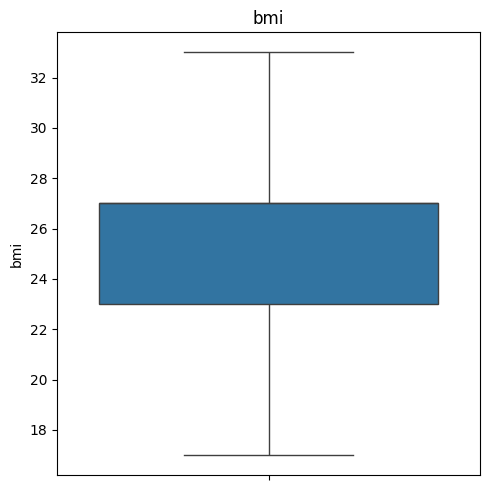

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(ax=axes, data=data3['bmi'])
axes.set_title('bmi')

plt.tight_layout()
plt.show()


## nah, selanjutnya yang ingin saya tambahkan adalah, akurasi.

## Visualizating Data

 **Setting Graph style**

In [21]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

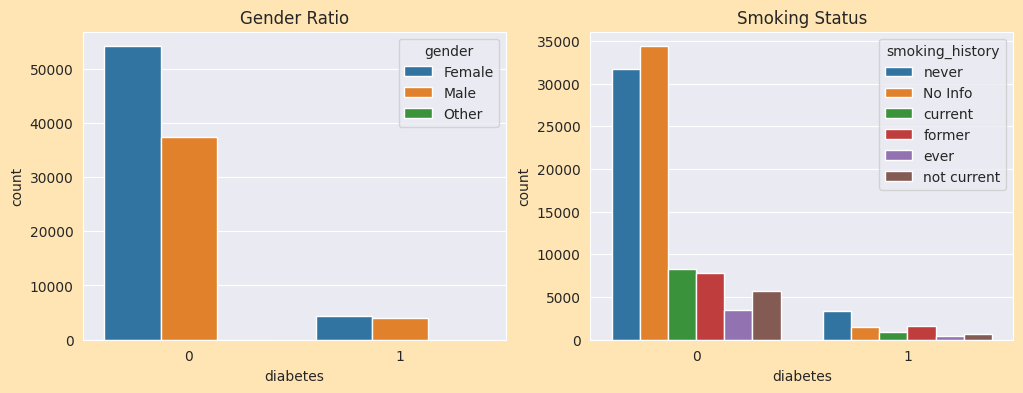

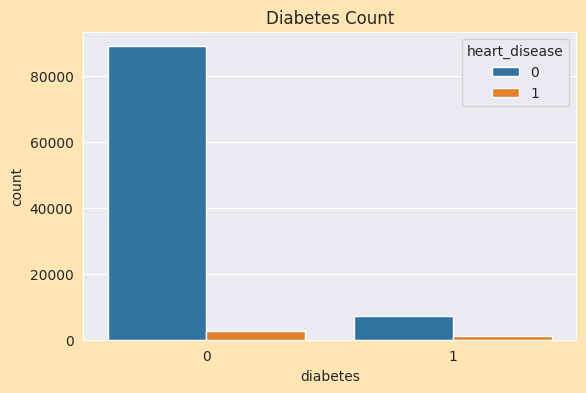

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = "diabetes", data=df, hue="gender")
plt.title('Gender Ratio')

plt.subplot(122)
sns.countplot(x = "diabetes", data=df, hue="smoking_history")
plt.title('Smoking Status')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.countplot(x = "diabetes", data=df, hue="heart_disease")
plt.title('Diabetes Count')

plt.show()

## Machine Learning Model

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Dengan mengimpor modul tersebut, saya dapat menggunakan fungsionalitas yang
disediakan oleh scikit-learn untuk melakukan preprocessing data, normalisasi(scaling) data, membagi(spliting) data, melatih(Training) model Logistic Regression dan mengevaluasi kinerja model menggunakan berbagai metric

#### Preprocessing Data

Mengganti nilai kategorikal dengan nilai numerik memungkinkan algoritma machine learning untuk memahami data lebih baik. Kode ini melakukan penggantian nilai 'gender' dan 'smoking_history' dengan nilai numerik untuk mempersiapkan data sebelum pelatihan model.

Hal ini diperlukan karena model yang akan saya buat "Logistic Regression" memerlukan input berupa numerik

In [24]:
df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}, inplace=True)
df['smoking_history'].replace(
    {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}, inplace=True)

/tmp/ipython-input-24-1613394577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}, inplace=True)
/tmp/ipython-input-24-1613394577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}

<Axes: >

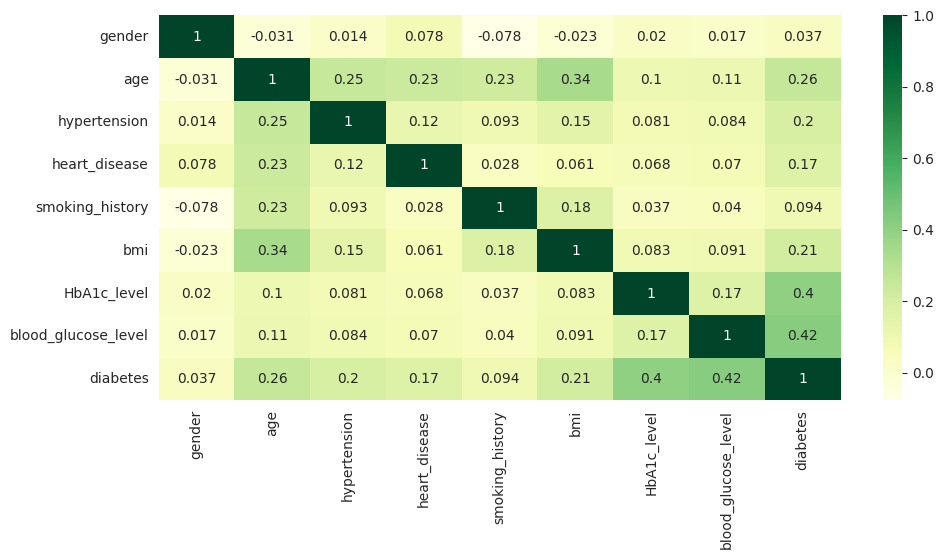

In [25]:
plt.rcParams['figure.figsize'] = (11,5)
plt.rcParams['figure.facecolor'] = '#FFFFFF'
sns.heatmap(df.corr(), annot=True, cmap="YlGn")

#### Data Splitting


- X = df.iloc[:,:-1]:

Mengambil semua baris (:) dan semua kolom kecuali kolom terakhir (:-1) dari dataset df.
Menyimpan hasil ini dalam variabel X, yang mewakili fitur (data yang digunakan untuk membuat prediksi).


- y = df.iloc[:,-1]:

Mengambil semua baris (:) dan hanya kolom terakhir (-1) dari dataset df.
Menyimpan hasil ini dalam variabel y, yang mewakili label (target yang ingin diprediksi).

In [26]:
X = df.iloc[:, :-1]  # Semua kolom kecuali 'diabetes'
y = df.iloc[:, -1]   # Kolom 'diabetes'

Pembagian data menjadi set pelatihan (X_train, y_train) dan pengujian (X_Test, y_test) menggunakan train_test_split adalah langkah penting dalam proses machine learning. Ini memastikan bahwa model tidak 'overfitting' atau 'underfitting' pada data. Kode ini menggunakan fungsi train_test_split dari scikit-learn untuk membagi data.

Sebanyak 80% data digunakan untuk pelatihan dan 20% untuk pengujian dan random_state=0 yang digunakan untuk memastikan reproduktibilitas hasil agar hasil dapat diverifikasi dan dibandingkan dengan konsistensi

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

CATATAN !!!

Overfitting = keadaan dimana model berusaha untuk mempelajari seluruh detail termasuk noise yang ada dalam data dan berusaha untuk mengikutsertakan semua data point ke dalam garis.

Underfitting = keadaan dimana model machine learning tidak bisa mempelajari hubungan antara variabel dalam data serta memprediksi atau mengklasifikasikan data point baru.

#### Data Scaling


Skala data sangat penting untuk algoritma yang berbasis jarak, seperti regresi linear. Menggunakan StandardScaler akan mengubah fitur sehingga memiliki rata-rata 0 dan deviasi 1 untuk meningkatkan kinerja model.

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Data pelatihan dan data uji dinormalisasi menggunakan StandardScaler untuk memastikan bahwa variabel-variabel memiliki skala yang serupa. Normalisasi penting dalam beberapa model machine learning, termasuk regresi linear, untuk memastikan konvergensi yang baik selama pelatihan.

#### Model Training


Ini adalah langkah di mana model aktual diterapkan ke data. Menggunakan model yang telah dilatih untuk membuat prediksi pada set pengujian.

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Dengan langkah-langkah sebelumnya saya telah menyiapkan data, membaginya menjadi data pelatihan dan uji, menormalisasi fitur dan melatih model LinearRegression menggunakan data pelatihan. Jadi model yang telah ditrain dapat digunakan untuk membuat prediksi pada data uji

#### Prediction dan Evaluation


Setelah pelatihan, model digunakan untuk membuat prediksi pada set pengujian. Metrik seperti akurasi, confusion matriks, dan laporan klasifikasi digunakan untuk mengevaluasi kinerja model.

In [30]:
# predicating
y_predLR = log_reg.predict(X_test)

Menggunakan model regresi linear yang telah dilatih (lin_reg), program membuat prediksi kelas untuk data uji (X_test). Hasil prediksi disimpan dalam variabel y_predLR.

In [31]:
# Confusion Metrix
metrics.confusion_matrix(y_test, y_predLR)

array([[18117,   180],
       [  608,  1095]])

In [32]:
y_pred_class = np.round(y_predLR)
y_test_class = np.round(y_test)

In [33]:
acc_LR = metrics.accuracy_score(y_test, y_predLR)
acc_LR

0.9606

Akurasi diukur dengan membandingkan prediksi (y_predLR) dengan label yang sebenarnya dari data uji (y_test). Hasil akurasi disimpan dalam variabel acc_LR.

Akurasi dihitung menggunakan rumus: (Jumlah Prediksi Benar) / (Jumlah Total Prediksi). Ini memberikan persentase seberapa banyak prediksi yang benar dari total prediksi.

##Mean Squared Error dan Classification Report

In [34]:
print(metrics.classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.64      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



untuk menghitung dan menampilkan dua metrik evaluasi, yaitu Mean Squared Error (MSE) dan R-squared (R²), untuk mengukur kinerja model regresi dalam memprediksi nilai target pada data uji (y_test) dibandingkan dengan nilai prediksi model (y_predLR).

Metrik ini digunakan untuk mengevaluasi performa model regresi:
MSE: Memberikan gambaran seberapa besar kesalahan yang dihasilkan oleh model.
R²: Memberikan wawasan tentang kemampuan model dalam menjelaskan variansi data target.

In [35]:
fpr, tpr, thres = metrics.roc_curve(y_test, y_predLR)
metrics.roc_auc_score(y_test, y_predLR)

np.float64(0.8165726464596633)

Text(0, 0.5, 'tpr')

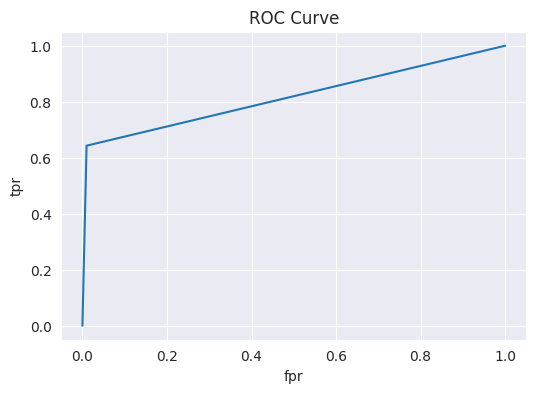

In [36]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")